<a href="https://colab.research.google.com/github/youkyung2/dataAnalysis/blob/master/%EC%9E%91%EC%97%85%ED%98%95_%EC%A0%9C2%EC%9C%A0%ED%98%95_%EC%98%88%EC%8B%9C%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

dataurl = 'https://raw.githubusercontent.com/youkyung2/dataAnalysis/master/dataq/'

In [2]:
y_train = pd.read_csv(dataurl + 'y_train.csv')
X_train = pd.read_csv(dataurl + 'X_train.csv', encoding='euc-kr')
test = pd.read_csv(dataurl + 'X_test.csv', encoding='euc-kr')

데이터 전처리 및 EDA

In [ ]:
X_train.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,3500.000000,3.500000e+03,3.500000e+03,1.205000e+03,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,9.191925e+07,1.966424e+07,2.407822e+07,19.253714,2.834963,0.307246,20.958286
std,1010.507298,1.635065e+08,3.199235e+07,4.746453e+07,27.174942,1.912368,0.289752,24.748682
min,0.000000,-5.242152e+07,-2.992000e+06,5.600000e+03,1.000000,1.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,2.259000e+06,2.000000,1.666667,0.027291,4.000000
50%,1749.500000,2.822270e+07,9.837000e+06,7.392000e+06,8.000000,2.333333,0.256410,13.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.412000e+07,25.000000,3.375000,0.448980,28.000000
max,3499.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
X_train.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [ ]:
X_train.select_dtypes(include = np.object)

,주구매상품,주구매지점
0,기타,강남점
1,스포츠,잠실점
2,남성 캐주얼,관악점
3,기타,광주점
4,보석,본 점
...,...,...
3495,골프,본 점
3496,시티웨어,부산본점
3497,주방용품,창원점
3498,화장품,본 점


In [4]:
X_train.select_dtypes(include = np.object).columns

Index(['주구매상품', '주구매지점'], dtype='object')

In [ ]:
y_train.head()
X_train.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [ ]:
trainDf = pd.merge(X_train, y_train)
trainDf

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0,0
3498,3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39,0


In [ ]:
X_train.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [ ]:
test.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [ ]:
trainDf[trainDf['환불금액'].isnull()].gender.value_counts()

0    1269
1    1026
Name: gender, dtype: int64

In [ ]:
trainDf['환불금액'].describe()

count    1.205000e+03
mean     2.407822e+07
std      4.746453e+07
min      5.600000e+03
25%      2.259000e+06
50%      7.392000e+06
75%      2.412000e+07
max      5.637530e+08
Name: 환불금액, dtype: float64

In [ ]:
trainDf['환불금액'] = trainDf['환불금액'].fillna(0)
test['환불금액'] = test['환불금액'].fillna(0)

In [ ]:
trainDf.isnull().sum()

cust_id    0
총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
gender     0
dtype: int64

In [ ]:
main_index = trainDf['주구매상품'].value_counts().index
main_index

Index(['기타', '가공식품', '농산물', '화장품', '시티웨어', '디자이너', '수산품', '캐주얼', '명품', '섬유잡화',
       '골프', '스포츠', '일용잡화', '육류', '모피/피혁', '남성 캐주얼', '구두', '건강식품', '차/커피',
       '아동', '피혁잡화', '축산가공', '주방용품', '셔츠', '젓갈/반찬', '주방가전', '트래디셔널', '남성정장',
       '생활잡화', '주류', '가구', '커리어', '대형가전', '란제리/내의', '식기', '액세서리', '침구/수예',
       '보석', '통신/컴퓨터', '악기', '소형가전', '남성 트랜디'],
      dtype='object')

In [ ]:
print('주구매상품 유일값 수 : ', len(main_index))
print('주구매상품 유일값 리스트 : ',list(main_index))

주구매상품 유일값 수 :  42
주구매상품 유일값 리스트 :  ['기타', '가공식품', '농산물', '화장품', '시티웨어', '디자이너', '수산품', '캐주얼', '명품', '섬유잡화', '골프', '스포츠', '일용잡화', '육류', '모피/피혁', '남성 캐주얼', '구두', '건강식품', '차/커피', '아동', '피혁잡화', '축산가공', '주방용품', '셔츠', '젓갈/반찬', '주방가전', '트래디셔널', '남성정장', '생활잡화', '주류', '가구', '커리어', '대형가전', '란제리/내의', '식기', '액세서리', '침구/수예', '보석', '통신/컴퓨터', '악기', '소형가전', '남성 트랜디']


In [ ]:
main_center = trainDf['주구매지점'].value_counts().index
main_center

Index(['본  점', '잠실점', '분당점', '부산본점', '영등포점', '일산점', '강남점', '광주점', '노원점',
       '청량리점', '대전점', '미아점', '부평점', '동래점', '관악점', '인천점', '안양점', '포항점', '대구점',
       '센텀시티점', '울산점', '전주점', '창원점', '상인점'],
      dtype='object')

In [ ]:
print('주구매지점 유일값 수 : ', len(main_center))
print('주구매지점 유일값 리스트 : ',list(main_center))

주구매지점 유일값 수 :  24
주구매지점 유일값 리스트 :  ['본  점', '잠실점', '분당점', '부산본점', '영등포점', '일산점', '강남점', '광주점', '노원점', '청량리점', '대전점', '미아점', '부평점', '동래점', '관악점', '인천점', '안양점', '포항점', '대구점', '센텀시티점', '울산점', '전주점', '창원점', '상인점']


In [ ]:
trainDf['주구매지점'].value_counts()

본  점     1077
잠실점       474
분당점       436
부산본점      245
영등포점      241
일산점       198
강남점       145
광주점       114
노원점        90
청량리점       86
대전점        70
미아점        69
부평점        57
동래점        49
관악점        46
인천점        34
안양점        29
포항점        11
대구점         7
센텀시티점       6
울산점         6
전주점         5
창원점         4
상인점         1
Name: 주구매지점, dtype: int64

In [ ]:
t = trainDf.copy()
numeric = t.select_dtypes(include=np.number).columns
numeric

Index(['cust_id', '총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기',
       'gender'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

cust_id


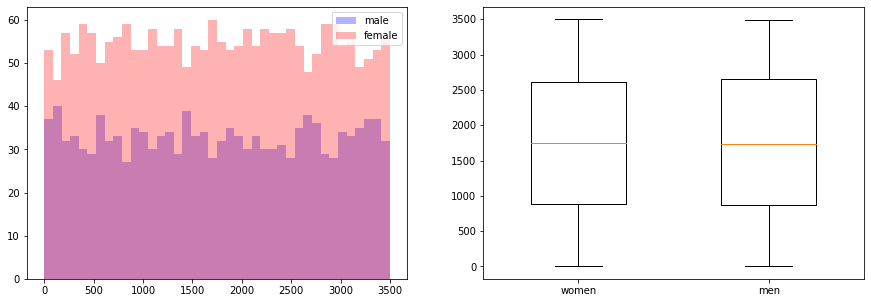

총구매액


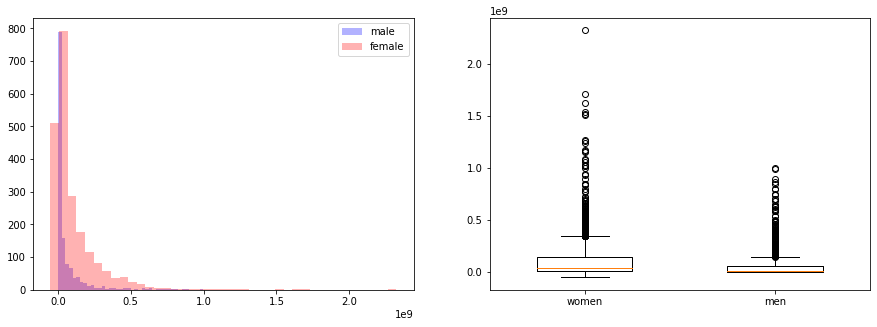

최대구매액


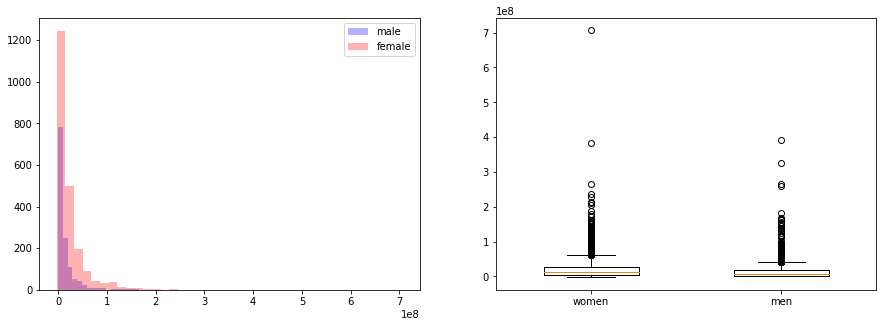

환불금액


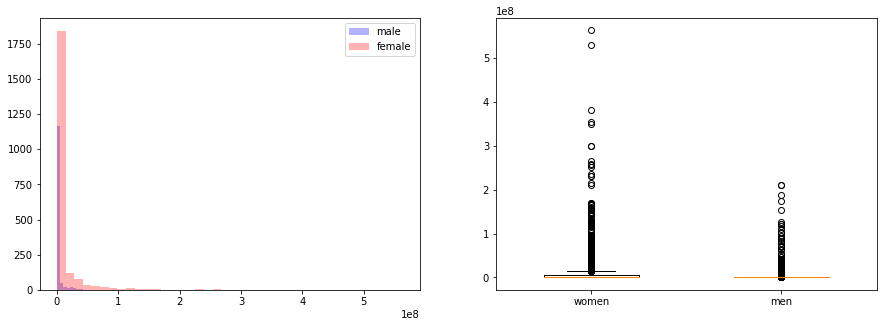

내점일수


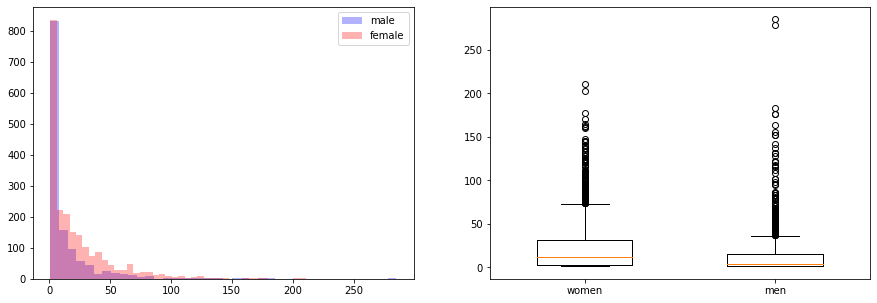

내점당구매건수


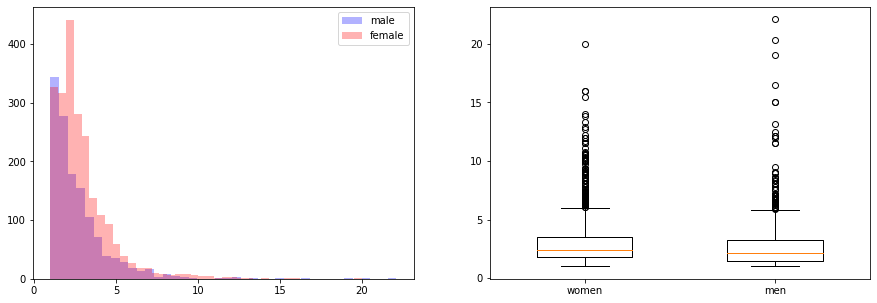

주말방문비율


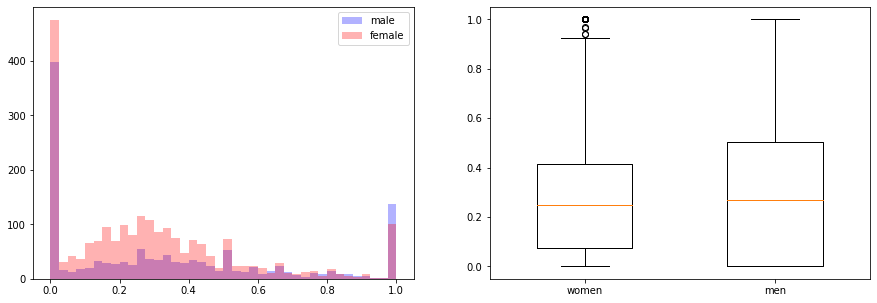

구매주기


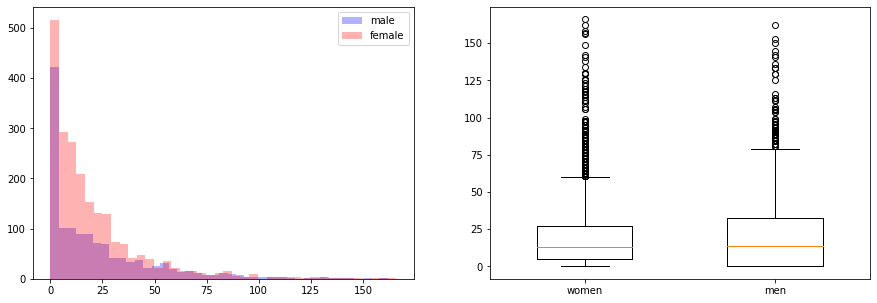

gender


ValueError: ignored

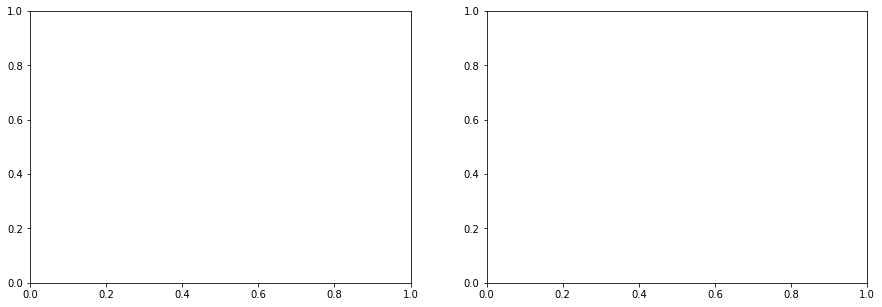

In [ ]:
for v in numeric :
  df = t[[v, 'gender']]

  male = df[df.gender == 1]
  female = df[df.gender == 0]
  fig, axes = plt.subplots(1,2,figsize=(15,5))

  print(v)
  axes[0].hist(male[v],alpha=0.3,color='blue',label='male',bins=40)
  axes[0].hist(female[v],alpha=0.3,color='red',label='female',bins=40)
  axes[0].legend()
  axes[1].boxplot(female[v],positions=[0],widths=0.5)
  axes[1].boxplot(male[v],positions=[1],widths=0.5)
  axes[1].set_xticklabels(['women','men'])
  plt.show()

In [ ]:
# 주 구매지점에 따른 데이터 재구성, 분석
t.groupby('주구매지점').agg(['mean','count'])['총구매액'].sort_values('count',
                                                             ascending=False).head(3)

,mean,count
주구매지점,,
본 점,1.023784e+08,1077
잠실점,8.377841e+07,474
분당점,7.318428e+07,436


In [ ]:
pv_t = t.groupby(['주구매지점','주구매상품'])['cust_id'].count().reset_index().\
rename(columns={
    'cust_id' : 'counts'
})
pv_t.head(3)

,주구매지점,주구매상품,counts
0,강남점,가공식품,22
1,강남점,건강식품,2
2,강남점,구두,1


In [ ]:
pv_data = pv_t.pivot(index='주구매지점',columns='주구매상품',values='counts').fillna(0)
pv_data.head(3)

주구매상품,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,대형가전,디자이너,란제리/내의,명품,모피/피혁,보석,생활잡화,섬유잡화,셔츠,소형가전,수산품,스포츠,시티웨어,식기,아동,악기,액세서리,육류,일용잡화,젓갈/반찬,주류,주방가전,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
주구매지점,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강남점,22.0,0.0,2.0,0.0,1.0,31.0,1.0,0.0,0.0,17.0,0.0,11.0,0.0,1.0,3.0,0.0,1.0,3.0,1.0,0.0,7.0,2.0,14.0,1.0,3.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,9.0
관악점,3.0,0.0,0.0,0.0,2.0,12.0,3.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0
광주점,5.0,0.0,1.0,3.0,2.0,31.0,0.0,0.0,0.0,11.0,0.0,8.0,0.0,6.0,1.0,0.0,0.0,4.0,1.0,0.0,3.0,4.0,9.0,0.0,4.0,1.0,0.0,3.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
# 비율로 보기
for v in pv_data.columns:
  pv_data[v] = pv_data[v]/pv_data.sum(axis=1)*100

pv_data.head(3)

주구매상품,가공식품,가구,건강식품,골프,구두,기타,남성 캐주얼,남성 트랜디,남성정장,농산물,대형가전,디자이너,란제리/내의,명품,모피/피혁,보석,생활잡화,섬유잡화,셔츠,소형가전,수산품,스포츠,시티웨어,식기,아동,악기,액세서리,육류,일용잡화,젓갈/반찬,주류,주방가전,주방용품,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
주구매지점,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강남점,15.172414,0.0,1.447467,0.000000,0.726639,22.570648,0.775692,0.0,0.0,13.209746,0.0,8.806862,0.0,0.814933,2.448492,0.0,0.819854,2.463201,0.824702,0.0,5.781271,1.668587,11.712491,0.852929,2.562002,0.000000,0.0,0.000000,3.428828,1.722849,0.863486,0.864505,0.000000,0.865519,1.733055,0.0,1.737074,0.0,0.0,0.870525,0.871507,7.852356
관악점,6.521739,0.0,0.000000,0.000000,4.038630,23.273689,4.774481,0.0,0.0,15.477830,0.0,1.426811,0.0,0.000000,1.418175,0.0,0.000000,1.409814,2.803430,0.0,0.000000,0.000000,5.544421,0.000000,0.000000,0.000000,0.0,1.357054,0.000000,0.000000,0.000000,0.000000,1.350510,0.000000,0.000000,0.0,2.688295,0.0,0.0,0.000000,0.000000,3.995478
광주점,4.385965,0.0,0.881943,2.648588,1.771220,27.509653,0.000000,0.0,0.0,10.073503,0.0,7.388876,0.0,5.573114,0.932550,0.0,0.000000,3.732548,0.935472,0.0,2.808110,3.750884,8.459249,0.000000,3.778873,0.946696,0.0,2.841521,0.948598,0.000000,0.000000,1.898121,0.949979,0.000000,1.900861,0.0,5.707962,0.0,0.0,0.000000,0.000000,4.769887


In [ ]:
pv_data.value_counts()

가공식품       가구        건강식품      골프        구두        기타         남성 캐주얼    남성 트랜디    남성정장      농산물        대형가전      디자이너       란제리/내의    명품         모피/피혁      보석        생활잡화      섬유잡화      셔츠        소형가전      수산품        스포츠       시티웨어        식기        아동        악기        액세서리      육류        일용잡화      젓갈/반찬     주류        주방가전      주방용품      차/커피      축산가공      침구/수예     캐주얼       커리어       통신/컴퓨터    트래디셔널     피혁잡화      화장품      
40.000000  0.000000  0.000000  0.000000  0.000000  2.325581   0.000000  0.000000  2.256034  0.000000   0.000000  0.000000   0.000000  0.000000   0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  2.193867   0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     1
28.571429  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000  5.957447   0.000000  0.000000   0.000000  0.0

In [ ]:
pv_data = pv_data.loc[pv_data.index != '상인점']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

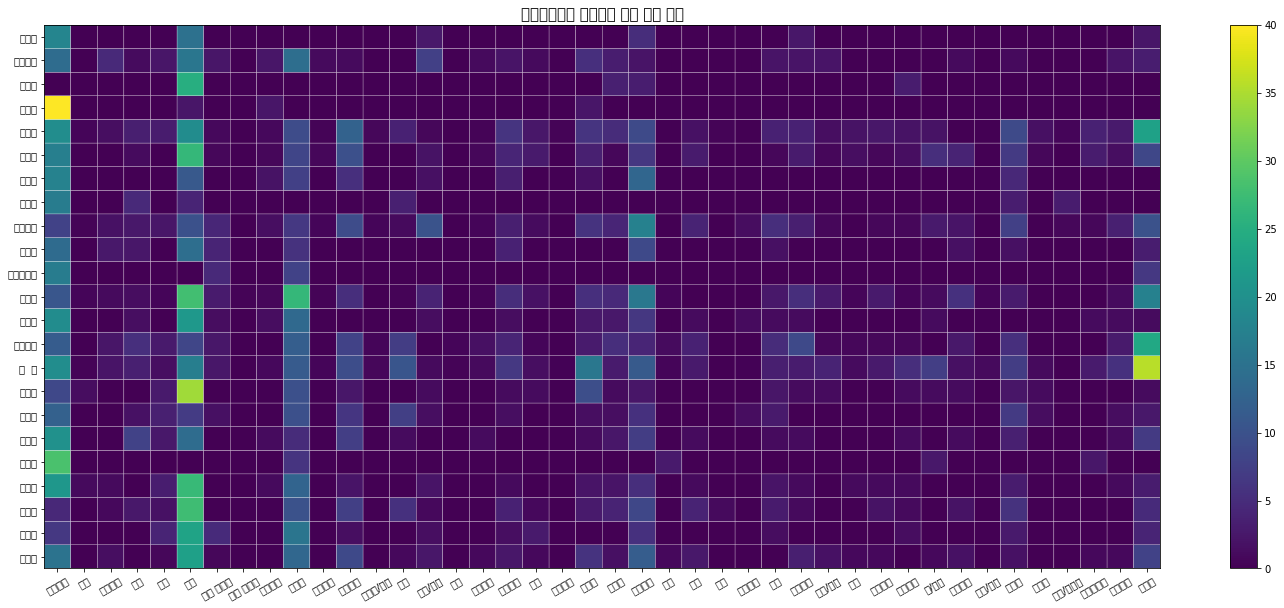

In [ ]:
plt.figure(figsize=(25,10))
plt.title('지점별 품목 카테고리 구매 건수',fontsize=1)
plt.pcolor(pv_data,edgecolor='white')
plt.colorbar()
plt.xticks(np.arange(pv_data.shape[1])+0.5,pv_data.columns,rotation=30)
plt.yticks(np.arange(pv_data.shape[0])+0.5,pv_data.index)
plt.title('주구매지점의 제품명에 따른 구매 비율',fontsize=15)
plt.show()

In [ ]:
center_gender = t.groupby(['주구매지점','gender']).count()['cust_id'].\
reset_index().pivot(index='주구매지점',columns='gender',values='cust_id').fillna(0)

In [ ]:
center_gender

gender,0,1
주구매지점,,
강남점,108.0,37.0
관악점,27.0,19.0
광주점,68.0,46.0
노원점,62.0,28.0
대구점,2.0,5.0
대전점,45.0,25.0
동래점,32.0,17.0
미아점,39.0,30.0
본 점,643.0,434.0


In [ ]:
center_gender['total'] = center_gender[0] + center_gender[1]
center_gender.head()

gender,0,1,total
주구매지점,,,
강남점,108.0,37.0,145.0
관악점,27.0,19.0,46.0
광주점,68.0,46.0,114.0
노원점,62.0,28.0,90.0
대구점,2.0,5.0,7.0


In [ ]:
center_gender['ratio'] = center_gender[1] / center_gender['total'] * 100
center_gender.head()

gender,0,1,total,ratio
주구매지점,,,,
강남점,108.0,37.0,145.0,25.517241
관악점,27.0,19.0,46.0,41.304348
광주점,68.0,46.0,114.0,40.350877
노원점,62.0,28.0,90.0,31.111111
대구점,2.0,5.0,7.0,71.428571


In [ ]:
t.groupby('주구매지점').mean()['총구매액'].to_frame().sort_values('총구매액').head(3)

,총구매액
주구매지점,
센텀시티점,1.098891e+07
전주점,3.200927e+07
안양점,6.055826e+07


Q5. 데이터 정규화 및 one-hot-encoding, 홀드아웃기법, smote방식의 오버샘플링과 랜덤포레스트 모델 학습 및 테스트셋 auc 값 추출

In [5]:
from sklearn.model_selection import train_test_split

In [ ]:
x = trainDf.drop(['cust_id','gender'],axis=1)
y = trainDf.gender

In [ ]:
# label 인코딩 => 강남점:1, 전주점:2 로 바꿔주는 것
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#x_label = x.copy()
#for v in ['주구매상품','주구매지점'] :
#  x_label[v] = le.fit_transform(x_label[v])

# x_label['주구매지점'].value_counts()

8     1077
19     474
11     436
9      245
15     241
18     198
0      145
2      114
3       90
22      86
5       70
7       69
10      57
6       49
1       46
17      34
14      29
23      11
4        7
16       6
13       6
20       5
21       4
12       1
Name: 주구매지점, dtype: int64

In [ ]:
x_dum = pd.get_dummies(x)
feature_name_lst = x_dum.columns

# get_dummies : 가변수화
# 기계학습모델이 이해할 수 있도록 모든데이터를 수치로 변환해주는 데이터전처리 작업 !
# 그럼, 월=1,화=2... 로 수치형으로 변환만 해주면 되는거 아닌가???
# => 수치형 데이터로만 변환을 하게 되면 서로 간의 관계성이 생기게 된다. (1+2=3)
# 따라서 서로 무관한 수, 즉 더미로 만든 가변수로 변환해준다!!

In [ ]:
x_dum.head(2)

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,주구매상품_구두,주구매상품_기타,주구매상품_남성 캐주얼,주구매상품_남성 트랜디,주구매상품_남성정장,주구매상품_농산물,주구매상품_대형가전,주구매상품_디자이너,주구매상품_란제리/내의,주구매상품_명품,주구매상품_모피/피혁,주구매상품_보석,주구매상품_생활잡화,주구매상품_섬유잡화,주구매상품_셔츠,주구매상품_소형가전,주구매상품_수산품,주구매상품_스포츠,주구매상품_시티웨어,주구매상품_식기,주구매상품_아동,주구매상품_악기,주구매상품_액세서리,주구매상품_육류,주구매상품_일용잡화,주구매상품_젓갈/반찬,주구매상품_주류,주구매상품_주방가전,주구매상품_주방용품,주구매상품_차/커피,주구매상품_축산가공,주구매상품_침구/수예,주구매상품_캐주얼,주구매상품_커리어,주구매상품_통신/컴퓨터,주구매상품_트래디셔널,주구매상품_피혁잡화,주구매상품_화장품,주구매지점_강남점,주구매지점_관악점,주구매지점_광주점,주구매지점_노원점,주구매지점_대구점,주구매지점_대전점,주구매지점_동래점,주구매지점_미아점,주구매지점_본 점,주구매지점_부산본점,주구매지점_부평점,주구매지점_분당점,주구매지점_상인점,주구매지점_센텀시티점,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,68282840,11264000,6860000.0,19,3.894737,0.527027,17,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2136000,2136000,300000.0,2,1.500000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
feature_name_lst

Index(['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기',
       '주구매상품_가공식품', '주구매상품_가구', '주구매상품_건강식품', '주구매상품_골프', '주구매상품_구두',
       '주구매상품_기타', '주구매상품_남성 캐주얼', '주구매상품_남성 트랜디', '주구매상품_남성정장', '주구매상품_농산물',
       '주구매상품_대형가전', '주구매상품_디자이너', '주구매상품_란제리/내의', '주구매상품_명품', '주구매상품_모피/피혁',
       '주구매상품_보석', '주구매상품_생활잡화', '주구매상품_섬유잡화', '주구매상품_셔츠', '주구매상품_소형가전',
       '주구매상품_수산품', '주구매상품_스포츠', '주구매상품_시티웨어', '주구매상품_식기', '주구매상품_아동',
       '주구매상품_악기', '주구매상품_액세서리', '주구매상품_육류', '주구매상품_일용잡화', '주구매상품_젓갈/반찬',
       '주구매상품_주류', '주구매상품_주방가전', '주구매상품_주방용품', '주구매상품_차/커피', '주구매상품_축산가공',
       '주구매상품_침구/수예', '주구매상품_캐주얼', '주구매상품_커리어', '주구매상품_통신/컴퓨터', '주구매상품_트래디셔널',
       '주구매상품_피혁잡화', '주구매상품_화장품', '주구매지점_강남점', '주구매지점_관악점', '주구매지점_광주점',
       '주구매지점_노원점', '주구매지점_대구점', '주구매지점_대전점', '주구매지점_동래점', '주구매지점_미아점',
       '주구매지점_본  점', '주구매지점_부산본점', '주구매지점_부평점', '주구매지점_분당점', '주구매지점_상인점',
       '주구매지점_센텀시티점', '주구매지점_안양점', '주구매지점_영등포점', '주구매지점_울산점', '주구매지점_인천점',
       '주구매지점_일산점', '주구매지점_잠실점', '주구매지

In [ ]:
# 테스트데이터에도 동일하게 적용해줌
test_dum = pd.get_dummies(test)

In [ ]:
# 훈련데이터에는 있지만 테스트데이터에는 없는 칼럼을 찾아서
missing_cols = set(x_dum.columns) - set(test_dum.columns)
missing_cols

{'주구매상품_소형가전'}

In [ ]:
# 0 으로 셋팅
for c in missing_cols :
  test_dum[c] = 0
test_dum = test_dum[x_dum.columns]
test_dum

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,주구매상품_구두,주구매상품_기타,주구매상품_남성 캐주얼,주구매상품_남성 트랜디,주구매상품_남성정장,주구매상품_농산물,주구매상품_대형가전,주구매상품_디자이너,주구매상품_란제리/내의,주구매상품_명품,주구매상품_모피/피혁,주구매상품_보석,주구매상품_생활잡화,주구매상품_섬유잡화,주구매상품_셔츠,주구매상품_소형가전,주구매상품_수산품,주구매상품_스포츠,주구매상품_시티웨어,주구매상품_식기,주구매상품_아동,주구매상품_악기,주구매상품_액세서리,주구매상품_육류,주구매상품_일용잡화,주구매상품_젓갈/반찬,주구매상품_주류,주구매상품_주방가전,주구매상품_주방용품,주구매상품_차/커피,주구매상품_축산가공,주구매상품_침구/수예,주구매상품_캐주얼,주구매상품_커리어,주구매상품_통신/컴퓨터,주구매상품_트래디셔널,주구매상품_피혁잡화,주구매상품_화장품,주구매지점_강남점,주구매지점_관악점,주구매지점_광주점,주구매지점_노원점,주구매지점_대구점,주구매지점_대전점,주구매지점_동래점,주구매지점_미아점,주구매지점_본 점,주구매지점_부산본점,주구매지점_부평점,주구매지점_분당점,주구매지점_상인점,주구매지점_센텀시티점,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
0,70900400,22000000,4050000.0,13,1.461538,0.789474,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,310533100,38558000,48034700.0,90,2.433333,0.369863,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,305264140,14825000,30521000.0,101,14.623762,0.083277,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7594080,5225000,0.0,5,2.000000,0.000000,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1795790,1411200,0.0,3,2.666667,0.125000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,82581500,23976000,0.0,8,1.750000,0.642857,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2478,480000,480000,0.0,1,1.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2479,260003790,25750000,0.0,19,3.736842,0.915493,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2480,88991520,18120000,0.0,5,3.600000,0.444444,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(x_dum)
x_dum = sc.transform(x_dum)
test_dum = sc.transform(test_dum)

In [ ]:
X_train, X_test, y_train ,y_test = train_test_split(x_dum, y, test_size=0.3,
                                                 random_state=60, stratify=y)

In [ ]:
print(len(X_train))
print(len(X_test))

2450
1050


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['class 0','class 1'])
print(report)

              precision    recall  f1-score   support

     class 0       0.74      0.55      0.63       655
     class 1       0.48      0.68      0.56       395

    accuracy                           0.60      1050
   macro avg       0.61      0.61      0.60      1050
weighted avg       0.64      0.60      0.60      1050



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

lr_probs = clf.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, lr_probs[:,1])
lr_auc

0.656857667407479

Q6. k-fold 방식의 여러 분류기 모델

In [ ]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import seaborn as sns


kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_dum, y = y, scoring = "roc_auc", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors",]})

In [97]:
cv_res[['CrossValMeans','Algorithm']]

,CrossValMeans,Algorithm
0,0.634343,SVC
1,0.538585,DecisionTree
2,0.579601,AdaBoost
3,0.647333,RandomForest
4,0.613898,ExtraTrees
5,0.663534,GradientBoosting
6,0.605172,MultipleLayerPerceptron
7,0.589136,KNeighboors


In [ ]:
# 상위성능을 보인 2개모델의 하이퍼 파라미터 튜닝 후 vote 앙상블

In [98]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(x_dum,y)
GBC_best = gsGBC.best_estimator_

gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  6.4min finished


0.6582857142857143

In [99]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(x_dum,y)
RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   38.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  6.8min finished


0.6597142857142856

In [100]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(x_dum,y)

In [101]:
test_gender = pd.Series(votingC.predict_proba(test_dum)[:,1], name="gender")

In [102]:
results= pd.concat([test.cust_id,test_gender],axis=1)
results.head(3)

,cust_id,gender
0,3500,0.387176
1,3501,0.195474
2,3502,0.164088




---
2번째 방법


In [6]:
y_train = pd.read_csv(dataurl + 'y_train.csv')
X_train = pd.read_csv(dataurl + 'X_train.csv',encoding='EUC-KR')
test = pd.read_csv(dataurl + 'X_test.csv', encoding='EUC-KR')

train = pd.merge(y_train, X_train)
train

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,0,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,1,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,1,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,0,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,3496,1,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,0,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,0,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39


In [7]:
test.isnull().sum()

cust_id       0
총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [8]:
train.isnull().sum()

cust_id       0
gender        0
총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [9]:
train['환불금액'].describe()

count    1.205000e+03
mean     2.407822e+07
std      4.746453e+07
min      5.600000e+03
25%      2.259000e+06
50%      7.392000e+06
75%      2.412000e+07
max      5.637530e+08
Name: 환불금액, dtype: float64

In [11]:
IQR = train.quantile(0.75) - train.quantile(0.25)

In [14]:
minimum = train.quantile(0.25) - (1.5 * IQR)
maximum = train.quantile(0.75) + (1.5 * IQR)

minimum

cust_id   -3.279063e+07
gender    -3.279150e+07
총구매액      -2.804445e+07
최대구매액     -2.991650e+07
환불금액      -3.053250e+07
내점일수      -3.279150e+07
내점당구매건수   -3.279150e+07
주말방문비율    -3.279150e+07
구매주기      -3.279150e+07
Name: 0.25, dtype: float64

In [17]:
train.loc[train['환불금액'] < minimum['환불금액']]

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기


In [21]:
train[(train['환불금액'] < minimum['환불금액']) | (train['환불금액'] > maximum['환불금액'])]

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
15,15,1,802390550,123488000,87054200.0,기타,본 점,152,3.585526,0.177982,2
17,17,0,114421760,28560000,59424000.0,화장품,본 점,23,2.260870,0.230769,14
35,35,0,190634260,20284000,82168800.0,기타,일산점,122,6.516393,0.276730,2
59,59,1,99215700,34000000,64691600.0,가공식품,잠실점,17,4.294118,0.356164,19
84,84,0,279508490,117760000,117760000.0,골프,분당점,21,2.523810,0.056604,15
...,...,...,...,...,...,...,...,...,...,...,...
3395,3395,0,586631800,23510200,82237000.0,명품,본 점,96,2.697917,0.436293,3
3417,3417,0,502859200,73348000,355115160.0,가공식품,대전점,112,3.607143,0.272277,3
3435,3435,0,432104650,53822300,109025800.0,기타,관악점,76,3.539474,0.468401,4
3446,3446,0,501501260,111200000,78034800.0,농산물,분당점,67,5.164179,0.208092,5


In [22]:
train[train['총구매액']<train['환불금액']]

,cust_id,gender,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
138,138,0,208000,954000,1007000.0,기타,강남점,2,4.500000,0.222222,1
167,167,0,3132000,3628800,3780000.0,구두,청량리점,4,1.750000,0.000000,51
254,254,1,4748600,12375000,12375000.0,스포츠,분당점,3,3.666667,0.272727,0
277,277,0,199528710,24528000,235199200.0,가공식품,본 점,90,3.822222,0.098837,3
295,295,1,1163100,19125000,19125000.0,농산물,본 점,3,3.333333,0.800000,2
...,...,...,...,...,...,...,...,...,...,...,...
3258,3258,0,97273770,67925000,148988000.0,기타,노원점,59,3.881356,0.139738,6
3346,3346,0,9369060,11792000,23573900.0,가공식품,노원점,84,3.023810,0.535433,4
3379,3379,0,1300000,2967000,2967000.0,시티웨어,분당점,3,2.000000,0.500000,81
3411,3411,0,0,3520000,3520000.0,디자이너,분당점,2,1.000000,0.000000,10


In [23]:
train['환불금액'] = train['환불금액'].fillna(0)
test['환불금액'] = test['환불금액'].fillna(0)

In [24]:
train.describe()

,cust_id,gender,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,3500.000000,3500.000000,3.500000e+03,3.500000e+03,3.500000e+03,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,0.376000,9.191925e+07,1.966424e+07,8.289786e+06,19.253714,2.834963,0.307246,20.958286
std,1010.507298,0.484449,1.635065e+08,3.199235e+07,3.010204e+07,27.174942,1.912368,0.289752,24.748682
min,0.000000,0.000000,-5.242152e+07,-2.992000e+06,0.000000e+00,1.000000,1.000000,0.000000,0.000000
25%,874.750000,0.000000,4.747050e+06,2.875000e+06,0.000000e+00,2.000000,1.666667,0.027291,4.000000
50%,1749.500000,0.000000,2.822270e+07,9.837000e+06,0.000000e+00,8.000000,2.333333,0.256410,13.000000
75%,2624.250000,1.000000,1.065079e+08,2.296250e+07,2.642250e+06,25.000000,3.375000,0.448980,28.000000
max,3499.000000,1.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000


In [25]:
train.dtypes

cust_id      int64
gender       int64
총구매액         int64
최대구매액        int64
환불금액       float64
주구매상품       object
주구매지점       object
내점일수         int64
내점당구매건수    float64
주말방문비율     float64
구매주기         int64
dtype: object

In [26]:
train = train[train['총구매액']>0]

In [27]:
train['주구매상품'].value_counts()

기타        594
가공식품      546
농산물       339
화장품       264
시티웨어      211
디자이너      190
수산품       153
캐주얼       101
명품        100
섬유잡화       98
골프         82
스포츠        68
일용잡화       64
육류         57
모피/피혁      57
남성 캐주얼     55
구두         54
건강식품       47
차/커피       43
아동         40
피혁잡화       39
축산가공       35
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       26
트래디셔널      23
남성정장       22
주류         14
생활잡화       14
가구         10
커리어         9
란제리/내의      8
대형가전        8
식기          7
액세서리        5
침구/수예       4
보석          3
통신/컴퓨터      3
남성 트랜디      2
악기          2
소형가전        2
Name: 주구매상품, dtype: int64

In [30]:
train['주구매지점'].value_counts()

본  점     1074
잠실점       474
분당점       433
부산본점      243
영등포점      240
일산점       197
강남점       145
광주점       114
노원점        90
청량리점       86
대전점        70
미아점        69
부평점        57
동래점        49
관악점        46
인천점        34
안양점        29
포항점        11
대구점         7
센텀시티점       6
울산점         6
전주점         5
창원점         4
상인점         1
Name: 주구매지점, dtype: int64

In [31]:
train = train.loc[train['주구매지점']!= '상안점']

파생변수 생성

In [32]:
train['최초구매액'] = train['총구매액'] + train['환불금액'] + 1
train['최대구매액비율'] = train['최대구매액'] / train['최초구매액']
train['환불금액비율'] = train['환불금액'] / train['최초구매액']
train['총구매건수'] = train['내점일수'] * train['내점당구매건수']

test['최초구매액'] = test['총구매액'] + test['환불금액'] + 1
test['최대구매액비율'] = test['최대구매액']/test['최초구매액']
test['환불금액비율'] = test['환불금액']/test['최초구매액']
test['총구매건수'] = test['내점일수']*test['내점당구매건수']

In [33]:
test.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,최초구매액,최대구매액비율,환불금액비율,총구매건수
count,2482.000000,2.482000e+03,2.482000e+03,2.482000e+03,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03,2.482000e+03,2.482000e+03,2482.000000
mean,4740.500000,1.010275e+08,2.177048e+07,8.965179e+06,19.516922,2.819388,0.293812,20.286060,1.099927e+08,-1.514461e+04,1.514509e+04,65.897663
std,716.636007,1.732132e+08,3.504919e+07,3.725172e+07,25.973972,1.754550,0.282600,24.108756,1.930607e+08,7.515152e+05,7.515151e+05,118.053602
min,3500.000000,-3.744000e+07,-3.744000e+07,0.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000e+00,-3.744000e+07,0.000000e+00,1.000000
25%,4120.250000,5.076868e+06,2.884350e+06,0.000000e+00,2.000000,1.750000,0.023456,4.000000,5.533951e+06,1.709745e-01,0.000000e+00,5.000000
50%,4740.500000,3.051686e+07,1.075250e+07,0.000000e+00,9.000000,2.430952,0.250000,13.000000,3.278164e+07,3.377988e-01,0.000000e+00,23.000000
75%,5360.750000,1.264255e+08,2.627700e+07,2.974250e+06,26.750000,3.375000,0.423566,27.000000,1.339045e+08,6.596557e-01,3.241052e-02,77.000000
max,5981.000000,2.861238e+09,5.932250e+08,8.715144e+08,222.000000,15.875000,1.000000,177.000000,2.998450e+09,1.000000e+00,3.744000e+07,1477.000000


In [37]:
temp = train.iloc[:,2:]
numerical_cols = temp.select_dtypes(include=np.number).columns
object_cols = temp.select_dtypes(include=np.object).columns

print(numerical_cols)
print(object_cols)

Index(['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기', '최초구매액',
       '최대구매액비율', '환불금액비율', '총구매건수'],
      dtype='object')
Index(['주구매상품', '주구매지점'], dtype='object')


모델링

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE # 오버샘플링 패키지. (지원안함)
from sklearn.preprocessing import StandardScaler

In [59]:
X = train.drop(['cust_id','gender'],axis=1)
y = train.gender

# train 데이터셋 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=60, stratify=y)


In [60]:
# 범주형데이터 원핫인코딩
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[object_cols]))

In [43]:
OH_cols

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
OH_cols.index = X.index
num_X = X.drop(object_cols, axis = 1)
X = pd.concat([num_X, OH_cols], axis = 1)

In [45]:
X

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,최초구매액,최대구매액비율,환불금액비율,총구매건수,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,68282840,11264000,6860000.0,19,3.894737,0.527027,17,75142841.0,0.149901,0.091293,74.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2136000,2136000,300000.0,2,1.500000,0.000000,1,2436001.0,0.876847,0.123153,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3197000,1639000,0.0,2,2.000000,0.000000,1,3197001.0,0.512668,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16077620,4935000,0.0,18,2.444444,0.318182,16,16077621.0,0.306948,0.000000,44.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29050000,24000000,0.0,2,1.500000,0.000000,85,29050001.0,0.826162,0.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,0.0,1,2.000000,1.000000,0,3175201.0,0.958333,0.000000,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3496,29628600,7200000,6049600.0,8,1.625000,0.461538,40,35678201.0,0.201804,0.169560,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,75000,75000,0.0,1,1.000000,0.000000,0,75001.0,0.999987,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3498,1875000,1000000,0.0,2,1.000000,0.000000,39,1875001.0,0.533333,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
OH_cols = pd.DataFrame(OH_encoder.transform(test[object_cols]))
OH_cols.index = test.index
num_test = test.drop(object_cols, axis = 1)
test = pd.concat([num_test, OH_cols], axis = 1)

In [50]:
# 오버샘플링
smote = SMOTE(sampling_strategy='auto', random_state=0)
X, y = smote.fit_sample(X, y)
X = pd.DataFrame(X)
y = pd.Series(y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [52]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

my_pipeline = Pipeline(steps=[('scaler',StandardScaler()),('model', XGBClassifier())])

In [53]:
# 교차검증
scores = cross_val_score(my_pipeline, X, y, cv = 5, scoring='roc_auc')

print("scores:\n", scores)
print("\nAverage score : ", scores.mean())

scores:
 [0.6676417  0.69162637 0.68503633 0.9569045  0.94668679]

Average score :  0.7895791382872047


In [54]:
# 모델 선택 및 튜닝
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('model' , XGBClassifier())])

param_grid = [{'model': [SVC()], 
              'model__gamma': [0.01, 0.1, 1, 10, 100], 
              'model__C': [0.01, 0.1, 1, 10, 100]
              },

              {'model': [XGBClassifier()], 
              'model__learning_rate' : [0.1, 0.3, 0.5],
              'model__n_estimators' : [50, 100, 200,],  
              'model__max_depth': [3, 4, 6]
              },

              {'model': [RandomForestClassifier()],
              'model__max_depth': [3, 4, 6], 
              'model__n_estimators': [50, 100, 200], 
              'model__min_samples_split': [50, 100]
              }]  

In [55]:
grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv=5)
grid.fit(X,y)

print(grid.best_params_)
print(grid.best_score_)

{'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 'model__learning_rate': 0.3, 'model__max_depth': 3, 'model__n_estimators': 50}
0.7936100891765039


In [57]:
# 최종모델 결정

my_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', XGBClassifier(n_estimators=200, max_depth=3))])


scores = cross_val_score(my_pipeline, X, y, cv = 5, scoring='roc_auc')
print("scores : \n",scores)
print("\nAverage score:", scores.mean())

scores : 
 [0.66487779 0.68664024 0.68599287 0.97137031 0.96224906]

Average score: 0.7942260530310088


In [65]:
# 제출

my_pipeline.fit(X,y)

test_gender = test.drop(['cust_id'],axis = 1)
test_gender = pd.Series(my_pipeline.predict_proba(test_gender)[:,1], name="gender")
results = pd.concat([test.cust_id, test_gender], axis = 1)
results.to_csv("XGBclassifier.csv", index = False)

results

,cust_id,gender
0,3500,0.474368
1,3501,0.165966
2,3502,0.136499
3,3503,0.396818
4,3504,0.454288
...,...,...
2477,5977,0.641796
2478,5978,0.602590
2479,5979,0.442973
2480,5980,0.491321
